In [1]:
import re
import pandas as pd
from datetime import datetime, date, time
from IPython.display import display
pd.options.display.max_columns = None
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline


# load and check the data



In [2]:
blog_data = pd.read_csv('blog_data - dataframe.csv',
                       dtype={'core_business': 'category',
                             'in_series': 'category',
                             'time_senstive_subject': 'category',
                             'engineering_design_tech': 'category',
                             'finance_utility_rate': 'category',
                             'solar_spotlight': 'category',
                             'solar_landamark': 'category',
                             'business_operation_sales': 'category',
                             'policy_industry_trends': 'category',
                             'influencer': 'category',
                             'current_event': 'category',
                              'author_x': 'category'
                             })
display(blog_data.head(10))

# this part of data comes from google sheet: https://docs.google.com/spreadsheets/d/1DJbsjTALDd6annAwbyGrpiLg2iFFHQUN-XQ5Ap2A1RE/edit#gid=0
# the categorical variable is classified by human beings

IOError: File blog_data - dataframe.csv does not exist

In [4]:
blog_data.to_csv('blog_data.csv')

In [3]:
blog_data.dtypes
blog_data.describe(include = 'all')


blog_title  sum_Pageviews  \
count                                         106     106.000000   
unique                                        106            NaN   
top     The Aurora Blog’s Top 10 Articles of 2017            NaN   
freq                                            1            NaN   
mean                                          NaN    1391.858491   
std                                           NaN    2400.927049   
min                                           NaN      34.000000   
25%                                           NaN     402.000000   
50%                                           NaN     606.000000   
75%                                           NaN    1236.250000   
max                                           NaN   18008.000000   

        sum_Unique_Pageviews  sum_Entrances  TimeOnPage  BounceRate  \
count             106.000000     106.000000  106.000000  106.000000   
unique                   NaN            NaN         NaN         NaN   
top                      NaN            NaN         NaN         NaN   
freq                     NaN            NaN         NaN         NaN   
mean              803.179245     650.764151   89.040566    0.449057   
std              1372.171389    1269.875701   38.315944    0.102581   
min                15.000000      10.000000   28.000000    0.200000   
25%               227.500000     145.500000   59.150000    0.400000   
50%               369.000000     249.500000   86.600000    0.400000   
75%               779.000000     554.000000  107.600000    0.500000   
max             10674.000000    9835.000000  209.000000    0.700000   

                                                    url_x    author_x  \
count                                                 106         106   
unique                                                106          11   
top     https://blog.aurorasolar.com/5-reasons-blockch...  Gwen Brown   
freq                                                    1          61   
mean                                                  NaN         NaN   
std                                                   NaN         NaN   
min                                                   NaN         NaN   
25%                                                   NaN         NaN   
50%                                                   NaN         NaN   
75%                                                   NaN         NaN   
max                                                   NaN         NaN   

        avg_word_count_in_sentence_x  avg_word_count_paragraph_x  \
count                     106.000000                  106.000000   
unique                           NaN                         NaN   
top                              NaN                         NaN   
freq                             NaN                         NaN   
mean                       23.150943                   47.255660   
std                         3.458468                    9.944609   
min                        12.300000                   25.200000   
25%                        20.925000                   41.050000   
50%                        23.500000                   45.400000   
75%                        25.600000                   53.400000   
max                        31.000000                   73.400000   

        total_word_count_x  graphic_paragraph_ratio_x  link_paragraph_ratio_x  \
count           106.000000                 106.000000              106.000000   
unique                 NaN                        NaN                     NaN   
top                    NaN                        NaN                     NaN   
freq                   NaN                        NaN                     NaN   
mean           1190.622642                   0.156321                0.421132   
std             401.227532                   0.094992                0.260945   
min             170.000000                   0.000000                0.000000   
25%             940.500000 

In [4]:
def create_new_time_sensitive(row):
    if int(row['current_event']) + int(row['time_senstive_subject']) > 0:
        return 1
    else:
        return 0
blog_data['time_senstive_subject'] = blog_data.apply(lambda row: create_new_time_sensitive(row), axis = 1)
blog_data = blog_data.drop('current_event', axis = 1)
blog_data

blog_title  sum_Pageviews  \
0    Shade Losses in PV Systems, and Techniques to ...          18008   
1    SDG&E’s New Time of Use Rates: How Solar Savin...          11440   
2    Choosing the Right Size Inverter for Your Sola...           8757   
3     How to Size a PV System from an Electricity Bill           6631   
4    California’s New Smart Inverter Requirements: ...           6804   
5                 The Beginner’s Guide to Solar Energy           6167   
6    The Ultimate Guide to NEM 2.0: Non-Bypassable ...           4346   
7    What Makes a Solar Sales Proposal Successful? ...           3777   
8    5 Reasons Blockchain Is Game-Changing for Sola...           3498   
9    How to Estimate a Homeowner’s Energy Load Profile           3199   
10                          How Time of Use Rates Work           2992   
11      How a Photovoltaic System Produces Electricity           2497   
12   Reading Your Electricity Bill: A Beginner’s Guide           2529   
13     The Basic Principles that Guide PV System Costs           2245   
14   How LIDAR is Transforming Remote Solar System ...           2293   
15   How Virtual Net Metering Opens New Markets of ...           2334   
16   A Supernatural Solar Roof for the Winchester M...           2390   
17   Solar Alphabet Soup: 4 Acronyms That You Shoul...           1745   
18   The 2018 State Solar Policy Changes You Need t...           1773   
19   Understanding PV System Losses, Part 1: Namepl...           1647   
20   White Paper: The Financial Impact of Net Energ...           1577   
21   11 Clever Solar House Designs from the U.S. De...           1540   
22   Making Sense of Demand Charges: What Are They ...           1713   
23   How Computer Vision Is Revolutionizing Solar D...           1379   
24   Four Steps to Optimize PV System Performance i...           1349   
25   An Impending SDG&E Deadline Has Big Implicatio...           1355   
26   Your Solar Finance Primer: What to Know About ...           1152   
27   How to Write Great Solar Sales Proposals - wit...           1216   
28   How Net Metering is Evolving: Three Changes Yo...           1085   
29   The Importance of Discounting Future Solar Sav...           1042   
..                                                 ...            ...   
76   Solar Has Played a Key Role in Job Creation an...            436   
77   SEIA President & CEO Abby Hopper on Solar Poli...            473   
78   The PG&E Rate Change that Cost Commercial Sola...            384   
79   Intriguing Insights from Intersolar: New Front...            362   
80   How Are Solar Job Markets Performing Around th...            356   
81                           A (Solar) Christmas Story            350   
82   Gain a Competitive Edge with These Principles ...            359   
83   How to Optimize Your Solar Sales with Proposal...            346   
84   Saving Millions for Low-Income Schools with So...            394   
85   NABCEP Leaders Discuss Solar Credentials and I...            371   
86   Financing Tips for Solar Installers: Insights ...            321   
87   Why Your Company Should Have a Solar Design Ce...            541   
88   Solar for "Canada’s House"— A Design for Ridea...            311   
89    5 Ways to Grow Your Solar Business with Facebook            330   
90   How Project Modeling Can Energize the Communit...            300   
91   Why Diversity Matters for Your Solar Company—a...            288   
92   Commercial Solar Financing: Three Bottom-Line ...            274   
93   The Hidden Factors that Affect Solar Savings: ...            264   
94   The Hidden Factors that Affect Solar Savings: ...            258   
95    Three Solar Industry Contests Driving Innovation            237   
96   Celebrating Independence Day with a Solar Desi...            215   
97   Are You Applying These Tactics to Close More S...            224   
98           Instructive Insights from Intersolar 2018            212   
99   Understanding PV System 

## removing outlier -- SDG&E’s New Time of Use Rates:

In [5]:
# display(blog_data[blog_data.blog_title == 'SDG&E’s New Time of Use Rates: How Solar Savings Are Changing, Backed by Data'])
# blog_data = blog_data[blog_data.blog_title != 'SDG&E’s New Time of Use Rates: How Solar Savings Are Changing, Backed by Data']

In [7]:
# Clustering

In [6]:
from sklearn.cluster import KMeans
# create kmeans object
kmeans = KMeans(n_clusters=4)
# fit kmeans object to data

clustering_features = ['avg_word_count_in_sentence_x', 'avg_word_count_paragraph_x',
                             'total_word_count_x', 'graphic_paragraph_ratio_x', 'link_paragraph_ratio_x',
                             'noun_pct_x', 'adj_pct_x', 'adv_pct_x', 'verb_pct_x', 'question_in_titles_x', 
                              'reading_level_1_x', 'reading_level_2_x', 'sub_heading_paragraph_ratio_x',
                             'blog_age'] + ['TimeOnPage', 'BounceRate', 'daily_pageview', 'daily_unique_pageview', 'daily_entrance'] + ['core_business', 'in_series', 'time_senstive_subject', 'engineering_design_tech', 'finance_utility_rate',
'solar_spotlight', 'solar_landamark', 'business_operation_sales', 'policy_industry_trends', 'influencer']
dt_cluster = blog_data[clustering_features]
kmeans.fit(dt_cluster)
# print location of clusters learned by kmeans object
# print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(dt_cluster)
blog_data.loc[:, 'cluster'] = y_km
blog_data.cluster = blog_data.cluster.astype('category')
#plot out
# plt.scatter(blog_data[cluster ==0].iloc[:, 16], blog_data[y_km ==0].iloc[:, 17], s=100, c='red')
# plt.scatter(blog_data[y_km ==1].iloc[:, 16], blog_data[y_km ==1].iloc[:, 17], s=100, c='black')
# plt.scatter(blog_data[y_km ==2].iloc[:, 16], blog_data[y_km ==2].iloc[:, 17], s=100, c='blue')
# plt.scatter(blog_data[y_km ==3].iloc[:, 16], blog_data[y_km ==3].iloc[:, 17], s=100, c='cyan')
blog_data.groupby('cluster').describe(include = 'all')

BounceRate                                                            \
             count unique top freq      mean       std  min    25%  50%  75%   
cluster                                                                        
0             17.0    NaN NaN  NaN  0.364706  0.049259  0.3  0.300  0.4  0.4   
1              9.0    NaN NaN  NaN  0.455556  0.088192  0.3  0.400  0.5  0.5   
2             34.0    NaN NaN  NaN  0.508824  0.093315  0.3  0.425  0.5  0.6   
3             46.0    NaN NaN  NaN  0.434783  0.101582  0.2  0.400  0.4  0.5   

             TimeOnPage                                                       \
         max      count unique top freq        mean        std   min     25%   
cluster                                                                        
0        0.4       17.0    NaN NaN  NaN   56.211765  17.147481  29.2  46.400   
1        0.6        9.0    NaN NaN  NaN   94.377778  32.514450  43.3  76.000   
2        0.7       34.0    NaN NaN  NaN  115.202941  32.603899  70.0  91.175   
3        0.6       46.0    NaN NaN  NaN   80.791304  36.796762  28.0  56.600   

                               adj_pct_x                                      \
            50%     75%    max     count unique top freq      mean       std   
cluster                                                                        
0         57.50   62.30   89.5      17.0    NaN NaN  NaN  0.115294  0.020346   
1        101.60  116.90  137.3       9.0    NaN NaN  NaN  0.118889  0.015366   
2        107.40  132.75  200.0      34.0    NaN NaN  NaN  0.112941  0.019776   
3         75.65   98.80  209.0      46.0    NaN NaN  NaN  0.122391  0.019112   

                                      adv_pct_x                            \
          min   25%   50%   75%   max     count unique top freq      mean   
cluster                                                                     
0        0.09  0.10  0.11  0.13  0.15      17.0    NaN NaN  NaN  0.036471   
1        0.10  0.11  0.11  0.13  0.15       9.0    NaN NaN  NaN  0.036667   
2        0.06  0.10  0.11  0.13  0.14      34.0    NaN NaN  NaN  0.035294   
3        0.08  0.11  0.12  0.13  0.18      46.0    NaN NaN  NaN  0.035870   

                                                author_x                     \
              std   min   25%   50%   75%   max    count unique         top   
cluster                                                                       
0        0.011695  0.02  0.03  0.04  0.04  0.07       17      6  Gwen Brown   
1        0.010000  0.03  0.03  0.03  0.04  0.06        9      3  Gwen Brown   
2        0.013081  0.02  0.03  0.03  0.04  0.06       34     10  Gwen Brown   
3        0.008583  0.02  0.03  0.04  0.04  0.05       46      8  Gwen Brown   

                                                avg_word_count_in_sentence_x  \
        freq mean  std  min  25%  50%  75%  max                        count   
cluster                                                                        
0          9  NaN  NaN  NaN  NaN  NaN  NaN  NaN                         17.0   
1          7  NaN  NaN  NaN  NaN  NaN  NaN  NaN                          9.0   
2         12  NaN  NaN  NaN  NaN  NaN  NaN  NaN                         34.0   
3         33  NaN  NaN  NaN  NaN  NaN  NaN  NaN                         46.0   

                                                                          \
        unique top freq       mean       std   min     25%   50%     75%   
cluster                                                                    
0          NaN NaN  NaN  23.529412  3.743956  15.9  22.100  24.4  25.600   
1          NaN NaN  NaN  22.477778  2.699434  19.2  20.100  22.2  24.200   
2          NaN NaN  NaN  21.894118  3.480329  12.3  19.575  21.8  24.100   
3          NaN NaN  NaN  24.071739  3.246856  16.3  21.600  24.3  26.375   

              avg_word_count_paragraph_x                             \
          max                      count unique top freq       mea

In [8]:
blog_data.head(10)

blog_title  sum_Pageviews  \
0  Shade Losses in PV Systems, and Techniques to ...          18008   
1  SDG&E’s New Time of Use Rates: How Solar Savin...          11440   
2  Choosing the Right Size Inverter for Your Sola...           8757   
3   How to Size a PV System from an Electricity Bill           6631   
4  California’s New Smart Inverter Requirements: ...           6804   
5               The Beginner’s Guide to Solar Energy           6167   
6  The Ultimate Guide to NEM 2.0: Non-Bypassable ...           4346   
7  What Makes a Solar Sales Proposal Successful? ...           3777   
8  5 Reasons Blockchain Is Game-Changing for Sola...           3498   
9  How to Estimate a Homeowner’s Energy Load Profile           3199   

   sum_Unique_Pageviews  sum_Entrances  TimeOnPage  BounceRate  \
0                 10674           9835       103.1         0.5   
1                  6018           5844        91.9         0.5   
2                  5070           4827        90.9         0.5   
3                  3492           2539       104.7         0.4   
4                  3363           3216        61.7         0.5   
5                  3844           2853       109.2         0.5   
6                  2348           2173       101.3         0.5   
7                  2282           2004        87.7         0.5   
8                  1759           1604        50.6         0.5   
9                  1765           1642        80.3         0.5   

                                               url_x         author_x  \
0  https://blog.aurorasolar.com/shading-losses-fo...  Christian Brown   
1  https://blog.aurorasolar.com/sdge-new-time-of-...      Andrew Gong   
2  https://blog.aurorasolar.com/choosing-the-righ...   David Bromberg   
3  https://blog.aurorasolar.com/how-to-size-a-pv-...  Christian Brown   
4  https://blog.aurorasolar.com/californias-new-s...       Gwen Brown   
5  https://blog.aurorasolar.com/the-beginners-gui...  Christian Brown   
6  https://blog.aurorasolar.com/the-ultimate-guid...      Andrew Gong   
7  https://blog.aurorasolar.com/what-makes-a-sola...       Gwen Brown   
8  https://blog.aurorasolar.com/5-reasons-blockch...       Gwen Brown   
9  https://blog.aurorasolar.com/how-to-estimate-a...       Gwen Brown   

   avg_word_count_in_sentence_x  avg_word_count_paragraph_x  \
0                          18.4                        42.1   
1                          23.6                        42.7   
2                          26.1                        68.8   
3                          24.4                        38.8   
4                          29.7                        45.6   
5                          21.7                        32.6   
6                          24.6                        45.6   
7                          25.7                        59.4   
8                          24.2                        50.8   
9                          25.7                        52.3   

   total_word_count_x  graphic_paragraph_ratio_x  link_paragraph_ratio_x  \
0                1179                       0.25                    0.39   
1                1579                       0.22                    0.41   
2                 757                       0.09                    0.55   
3                 660                       0.12                    0.71   
4                1368                       0.13                    0.37   
5                 847                       0.15                    0.35   
6                1277                       0.04                    0.11   
7                2437                       0.27                    0.24   
8                2032                       0.07                    0.60   
9                1516                       0.24                    0.28   

   noun_pct_x post_date_x  adj_pct_x  adv_pct_x  verb_pct_x  \
0        0.32  2016-10-07       0.11       0.03        0.14   
1        0.31  2017-12-06       0.14       0.03        0.14   
2        

In [10]:
# blog_data.solar_landamark.value_counts()

# dependent variables


In [9]:
dt_dependent = blog_data[['daily_pageview', 'daily_unique_pageview', 'TimeOnPage', 'BounceRate', 'daily_entrance',
                         'sum_Entrances', 'sum_Pageviews', 'sum_Unique_Pageviews']]
print(dt_dependent.describe())


       daily_pageview  daily_unique_pageview  TimeOnPage  BounceRate  \
count      106.000000             106.000000  106.000000  106.000000   
mean         4.037736               1.943396   89.040566    0.449057   
std          6.102185               3.203659   38.315944    0.102581   
min          0.000000               0.000000   28.000000    0.200000   
25%          1.000000               0.000000   59.150000    0.400000   
50%          2.000000               1.000000   86.600000    0.400000   
75%          5.000000               2.000000  107.600000    0.500000   
max         43.000000              22.000000  209.000000    0.700000   

       daily_entrance  sum_Entrances  sum_Pageviews  sum_Unique_Pageviews  
count      106.000000     106.000000     106.000000            106.000000  
mean         1.490566     650.764151    1391.858491            803.179245  
std          3.083737    1269.875701    2400.927049           1372.171389  
min          0.000000      10.000000      34.00

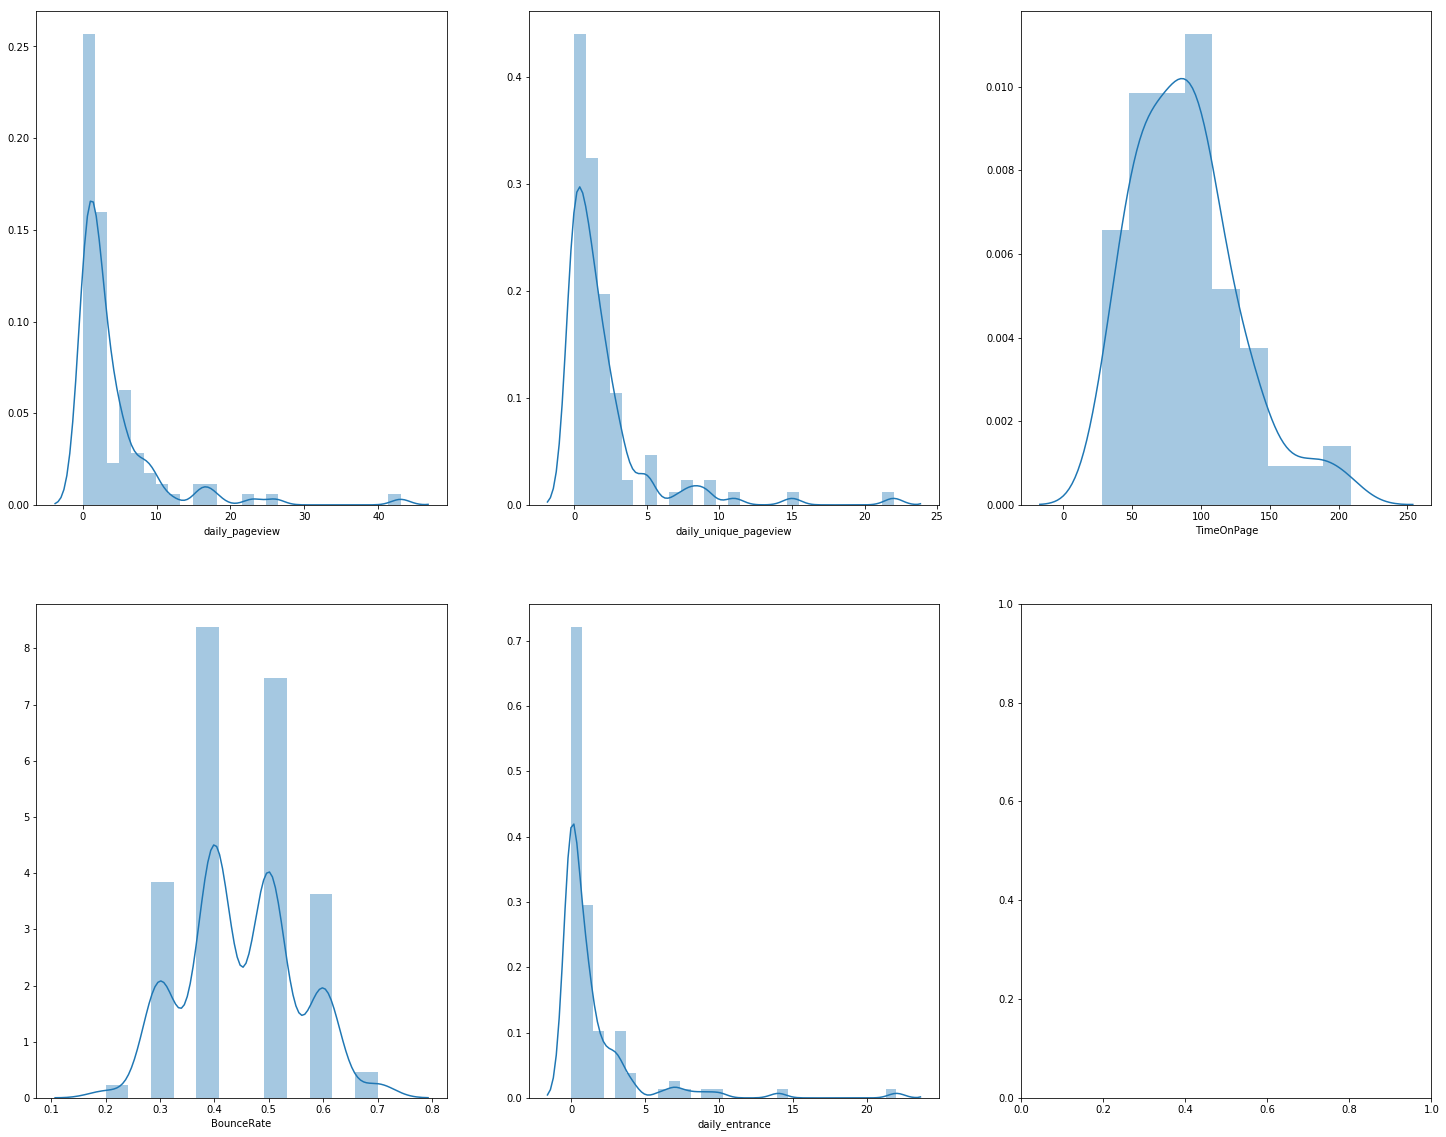

In [17]:
fig, ax = plt.subplots(2, 3, figsize = (25, 20))

for i, ax in enumerate(fig.axes):
    if i <= 4:
        sns.distplot(dt_dependent.iloc[:, i], ax = ax)


# split numerical and categorical variables


In [19]:

dt_num = blog_data.select_dtypes(include = ['float64', 'int64'])
dt_num1 = dt_num.drop(['daily_unique_pageview', 'TimeOnPage', 'BounceRate', 'daily_entrance',
                         'sum_Entrances', 'sum_Pageviews', 'sum_Unique_Pageviews'], axis = 1)
dt_num1.head()

avg_word_count_in_sentence_x  avg_word_count_paragraph_x  \
0                          18.4                        42.1   
1                          23.6                        42.7   
2                          26.1                        68.8   
3                          24.4                        38.8   
4                          29.7                        45.6   

   total_word_count_x  graphic_paragraph_ratio_x  link_paragraph_ratio_x  \
0                1179                       0.25                    0.39   
1                1579                       0.22                    0.41   
2                 757                       0.09                    0.55   
3                 660                       0.12                    0.71   
4                1368                       0.13                    0.37   

   noun_pct_x  adj_pct_x  adv_pct_x  verb_pct_x  question_in_titles_x  \
0        0.32       0.11       0.03        0.14                     0   
1        0.31       0.14       0.03        0.14                     3   
2        0.29       0.11       0.04        0.16                     0   
3        0.35       0.12       0.02        0.13                     1   
4        0.29       0.13       0.04        0.17                     4   

   reading_level_1_x  reading_level_2_x  sub_heading_paragraph_ratio_x  \
0              40.96              12.12                           0.14   
1              44.98              12.85                           0.05   
2              37.37              14.53                           0.27   
3              37.40              14.10                           0.12   
4              21.03              17.71                           0.10   

   blog_age  daily_pageview  time_senstive_subject  
0       690              26                      0  
1       265              43                      1  
2       532              16                      0  
3       690               9                      0  
4       293              23                      1

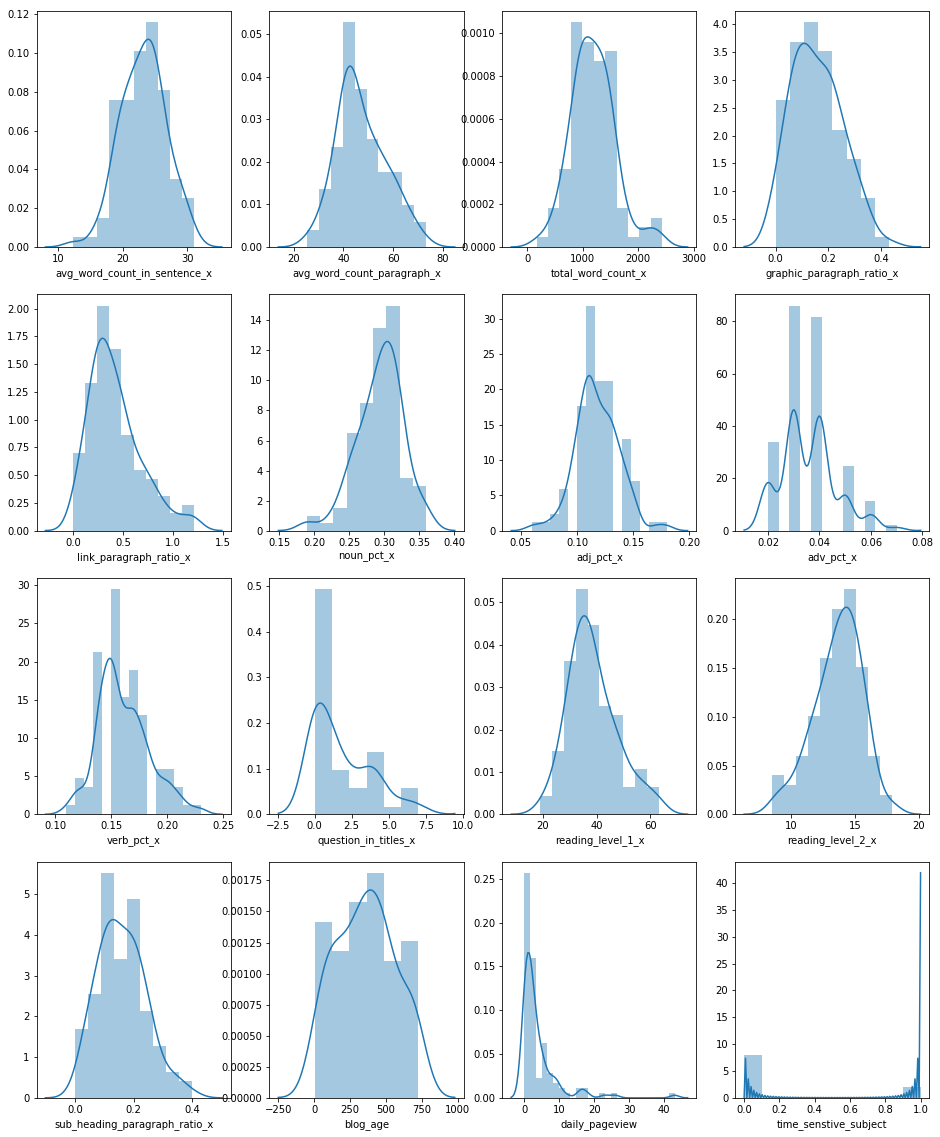

In [27]:
fig, ax = plt.subplots(4,4, figsize=(16, 20))
for ii, axs in enumerate(fig.axes):
    sns.distplot(dt_num1.iloc[:, ii], ax = axs)

In [25]:
# dt_num1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [14]:
# blog_data[blog_data.cluster == 3].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

# correlation
Now we'll try to find which features are strongly correlated with daily_pageview. We'll store them in a var called golden_features_list. We'll reuse our dt_num dataset to do so.

In [28]:
# correlatin with daily_pageview
dt_num_corr = dt_num.corr()['daily_pageview'][:-1] # -1 because the latest row is SalePrice
golden_features_list = dt_num_corr[abs(dt_num_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with daily_pageview:\n{}".format(len(golden_features_list), golden_features_list))

There is 16 strongly correlated values with daily_pageview:
daily_pageview                  1.000000
daily_unique_pageview           0.986139
daily_entrance                  0.977324
sum_Pageviews                   0.778251
sum_Entrances                   0.761380
sum_Unique_Pageviews            0.733981
reading_level_2_x               0.160829
total_word_count_x              0.153014
avg_word_count_in_sentence_x    0.138901
noun_pct_x                      0.135791
adj_pct_x                       0.129019
adv_pct_x                      -0.108650
verb_pct_x                     -0.116124
reading_level_1_x              -0.140787
blog_age                       -0.207674
TimeOnPage                     -0.227052
Name: daily_pageview, dtype: float64


In [16]:
# correlation with TimeOnPage
dt_num_corr = dt_num.corr()['TimeOnPage'][:-1] # -1 because the latest row is SalePrice
golden_features_list1 = dt_num_corr[abs(dt_num_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with TimeOnPage:\n{}".format(len(golden_features_list1), golden_features_list1))


There is 17 strongly correlated values with TimeOnPage:
TimeOnPage                      1.000000
blog_age                        0.683095
BounceRate                      0.563564
reading_level_1_x               0.314070
question_in_titles_x            0.187581
verb_pct_x                      0.156643
sum_Unique_Pageviews            0.100956
graphic_paragraph_ratio_x      -0.102700
avg_word_count_paragraph_x     -0.112758
avg_word_count_in_sentence_x   -0.148207
daily_entrance                 -0.174897
noun_pct_x                     -0.181958
daily_unique_pageview          -0.201562
adj_pct_x                      -0.261696
reading_level_2_x              -0.283555
daily_pageview                 -0.297062
link_paragraph_ratio_x         -0.297599
Name: TimeOnPage, dtype: float64


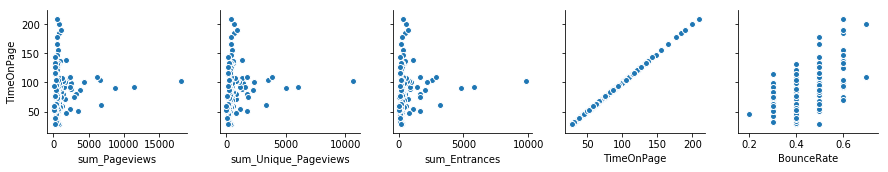

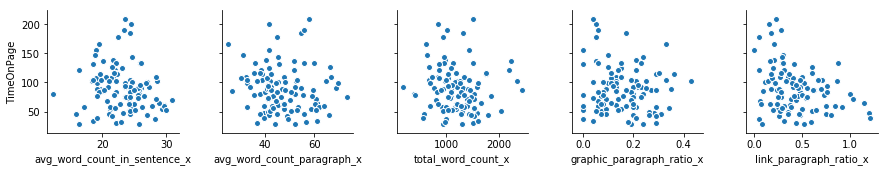

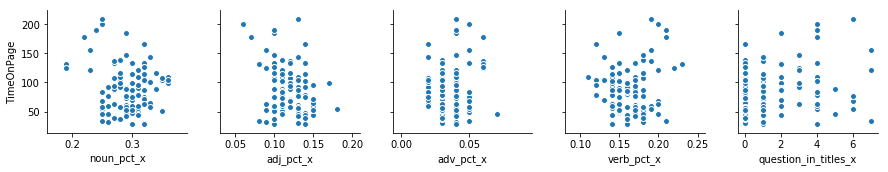

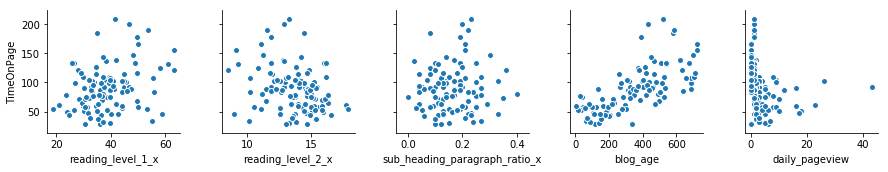

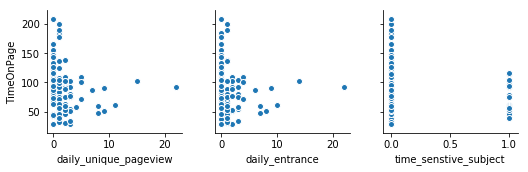

In [29]:
for i in range(0, len(dt_num.columns), 5):
    sns.pairplot(data=dt_num,
                x_vars=dt_num.columns[i:i+5],
                y_vars=['TimeOnPage'])


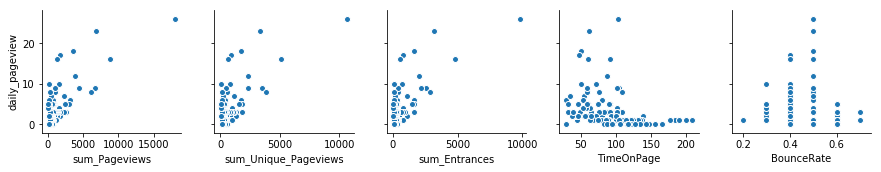

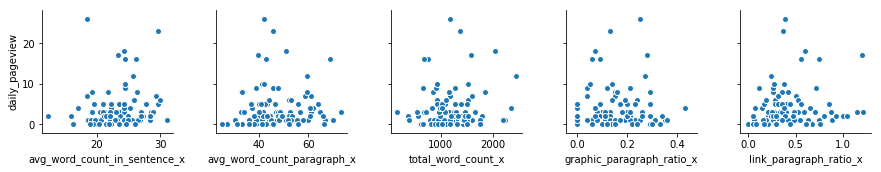

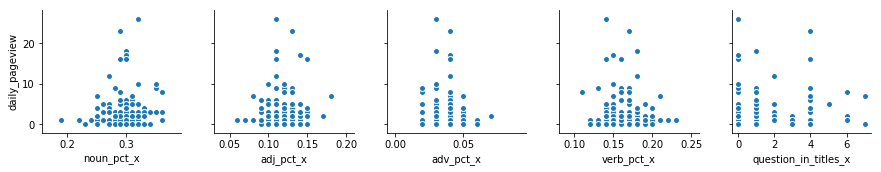

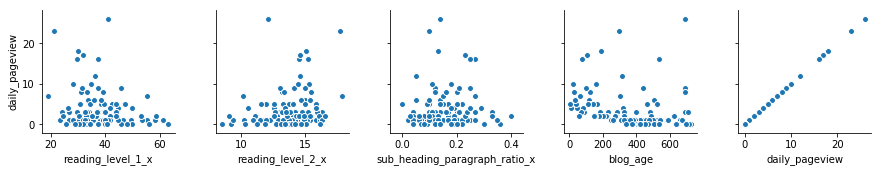

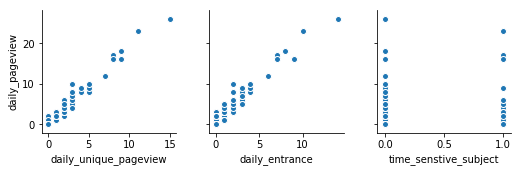

In [18]:
for i in range(0, len(dt_num.columns), 5):
    sns.pairplot(data=dt_num,
                x_vars=dt_num.columns[i:i+5],
                y_vars=['daily_pageview'])

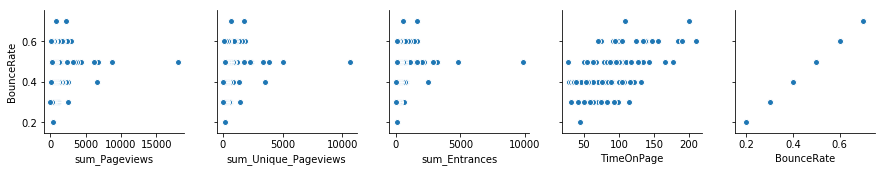

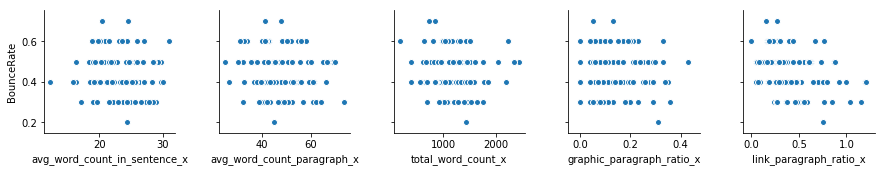

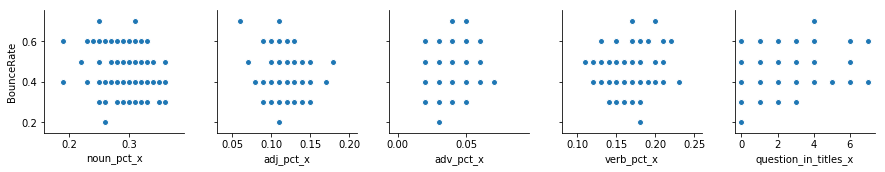

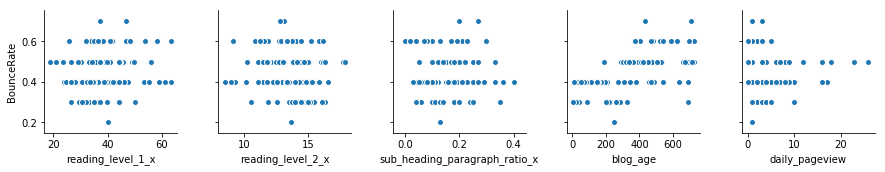

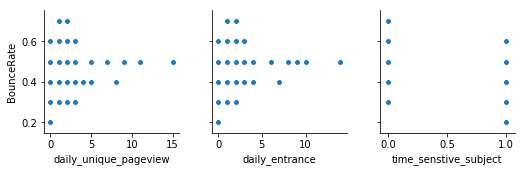

In [19]:
for i in range(0, len(dt_num.columns), 5):
    sns.pairplot(data=dt_num,
                x_vars=dt_num.columns[i:i+5],
                y_vars=['BounceRate'])

# Feature to feature relationship
Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

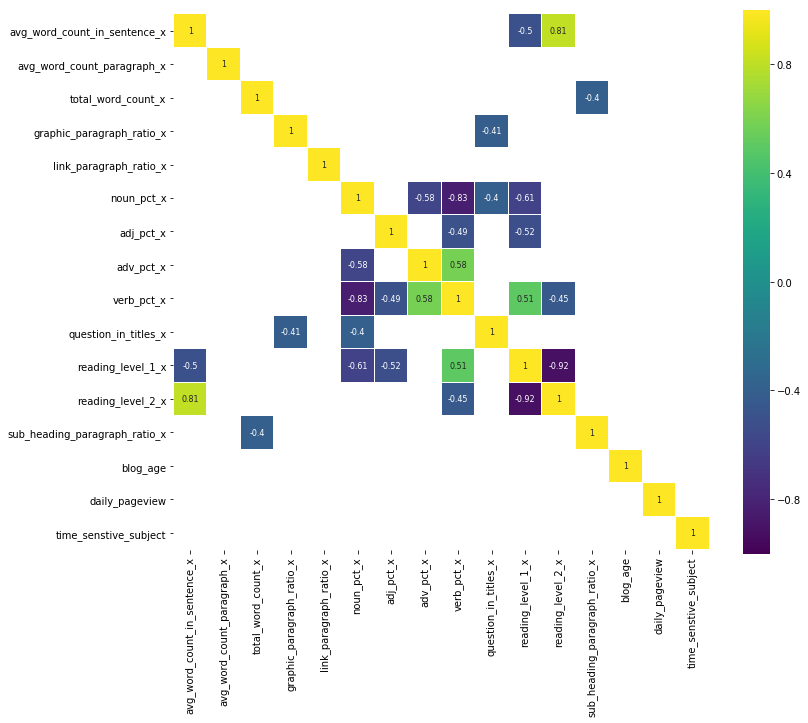

In [20]:
corr = dt_num1.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


# Q -> Q (Quantitative to Quantitative relationship)

In [35]:
quantitative_features_list = ['avg_word_count_in_sentence_x', 'avg_word_count_paragraph_x',
                             'total_word_count_x', 'graphic_paragraph_ratio_x', 'link_paragraph_ratio_x',
                             'noun_pct_x', 'adj_pct_x', 'adv_pct_x', 'verb_pct_x', 'question_in_titles_x', 
                              'reading_level_1_x', 'reading_level_2_x', 'sub_heading_paragraph_ratio_x',
                             'blog_age']
df_quantitative_values = blog_data[quantitative_features_list]
df_quantitative_values.head()

features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('daily_unique_pageview')
features_to_analyse

['avg_word_count_in_sentence_x',
 'total_word_count_x',
 'noun_pct_x',
 'adj_pct_x',
 'adv_pct_x',
 'verb_pct_x',
 'reading_level_1_x',
 'reading_level_2_x',
 'blog_age',
 'daily_unique_pageview']

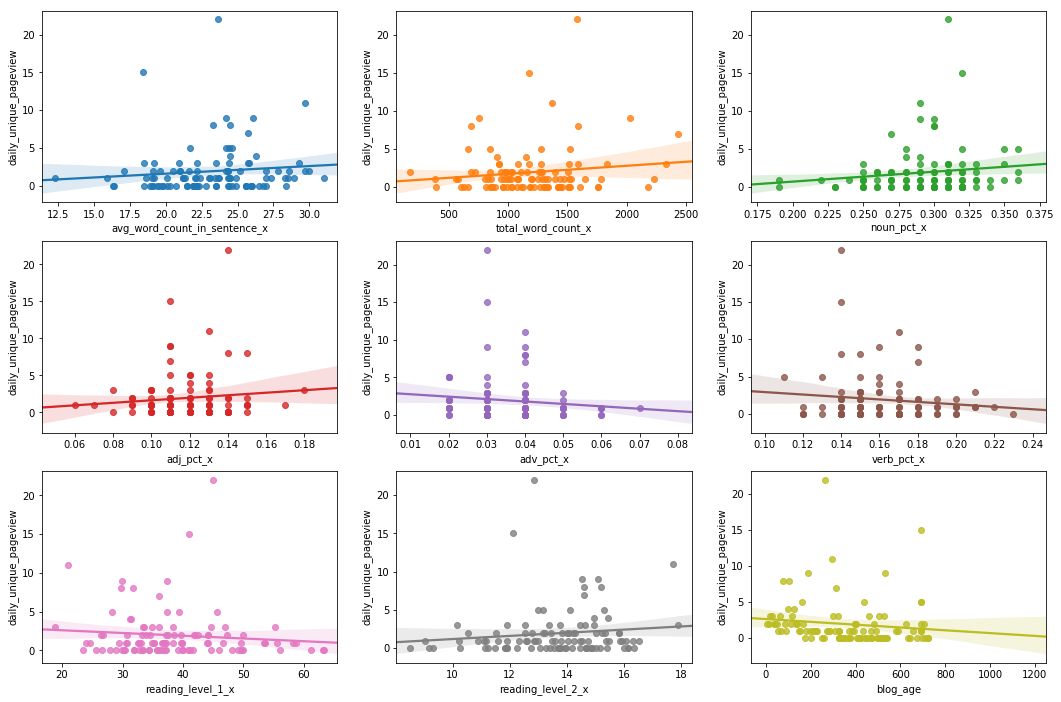

In [36]:
fig, ax = plt.subplots(int(round(len(features_to_analyse) / 3)), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],
                    y='daily_unique_pageview', 
                    data=blog_data[features_to_analyse], 
                    ax=ax
                   )


In [24]:
# from sklearn.cluster import KMeans
# # create kmeans object
# kmeans = KMeans(n_clusters=4)
# # fit kmeans object to data

# clustering_features = ['avg_word_count_in_sentence_x', 'avg_word_count_paragraph_x',
#                              'total_word_count_x', 'graphic_paragraph_ratio_x', 'link_paragraph_ratio_x',
#                              'noun_pct_x', 'adj_pct_x', 'adv_pct_x', 'verb_pct_x', 'question_in_titles_x', 
#                               'reading_level_1_x', 'reading_level_2_x', 'sub_heading_paragraph_ratio_x',
#                              'blog_age'] + ['TimeOnPage', 'BounceRate', 'daily_pageview', 'daily_unique_pageview', 'daily_entrance'] + ['core_business', 'in_series', 'time_senstive_subject', 'engineering_design_tech', 'finance_utility_rate',
# 'solar_spotlight', 'solar_landamark', 'business_operation_sales', 'policy_industry_trends', 'influencer']
# dt_cluster = blog_data[clustering_features]
# kmeans.fit(dt_cluster)
# # print location of clusters learned by kmeans object
# # print(kmeans.cluster_centers_)
# # save new clusters for chart
# y_km = kmeans.fit_predict(dt_cluster)
# blog_data.loc[:, 'cluster'] = y_km
# blog_data.cluster = blog_data.cluster.astype('category')
# #plot out
# plt.scatter(dt_num[y_km ==0].iloc[:, 16], dt_num[y_km ==0].iloc[:, 17], s=100, c='red')
# plt.scatter(dt_num[y_km ==1].iloc[:, 16], dt_num[y_km ==1].iloc[:, 17], s=100, c='black')
# plt.scatter(dt_num[y_km ==2].iloc[:, 16], dt_num[y_km ==2].iloc[:, 17], s=100, c='blue')
# plt.scatter(dt_num[y_km ==3].iloc[:, 16], dt_num[y_km ==3].iloc[:, 17], s=100, c='cyan')


# C -> Q (Categorical to Quantitative relationship)



In [41]:
# quantitative_features_list[:-1] as the last column is SalePrice and we want to keep it
categorical_features = ['core_business', 'in_series', 'time_senstive_subject', 'engineering_design_tech',
                       'finance_utility_rate', 'solar_spotlight', 'solar_landamark', 'business_operation_sales',
                       'policy_industry_trends', 'influencer', 'cluster']
categorical_features.append('daily_unique_pageview')
df_categ = blog_data[categorical_features]
# df_categ.head()

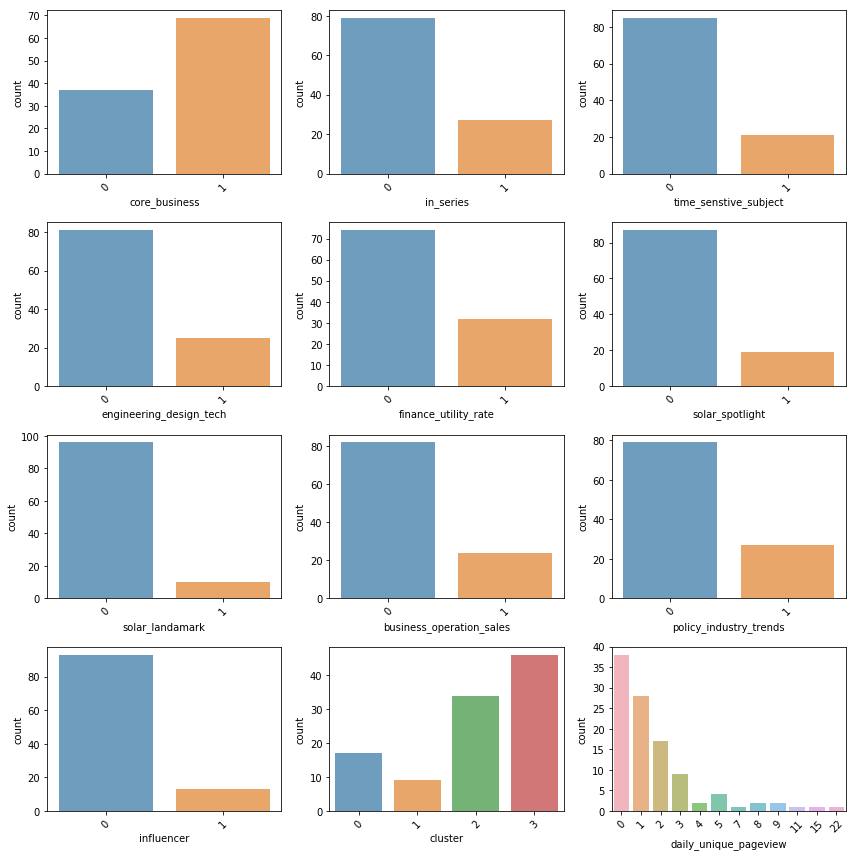

In [42]:
fig, axes = plt.subplots(int(round(len(categorical_features) / 3)), 3, figsize=(12, 12))

for i, ax in enumerate(fig.axes):
    if i < len(df_categ.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_categ.columns[i], alpha=0.7, data=df_categ, ax=ax)

fig.tight_layout()

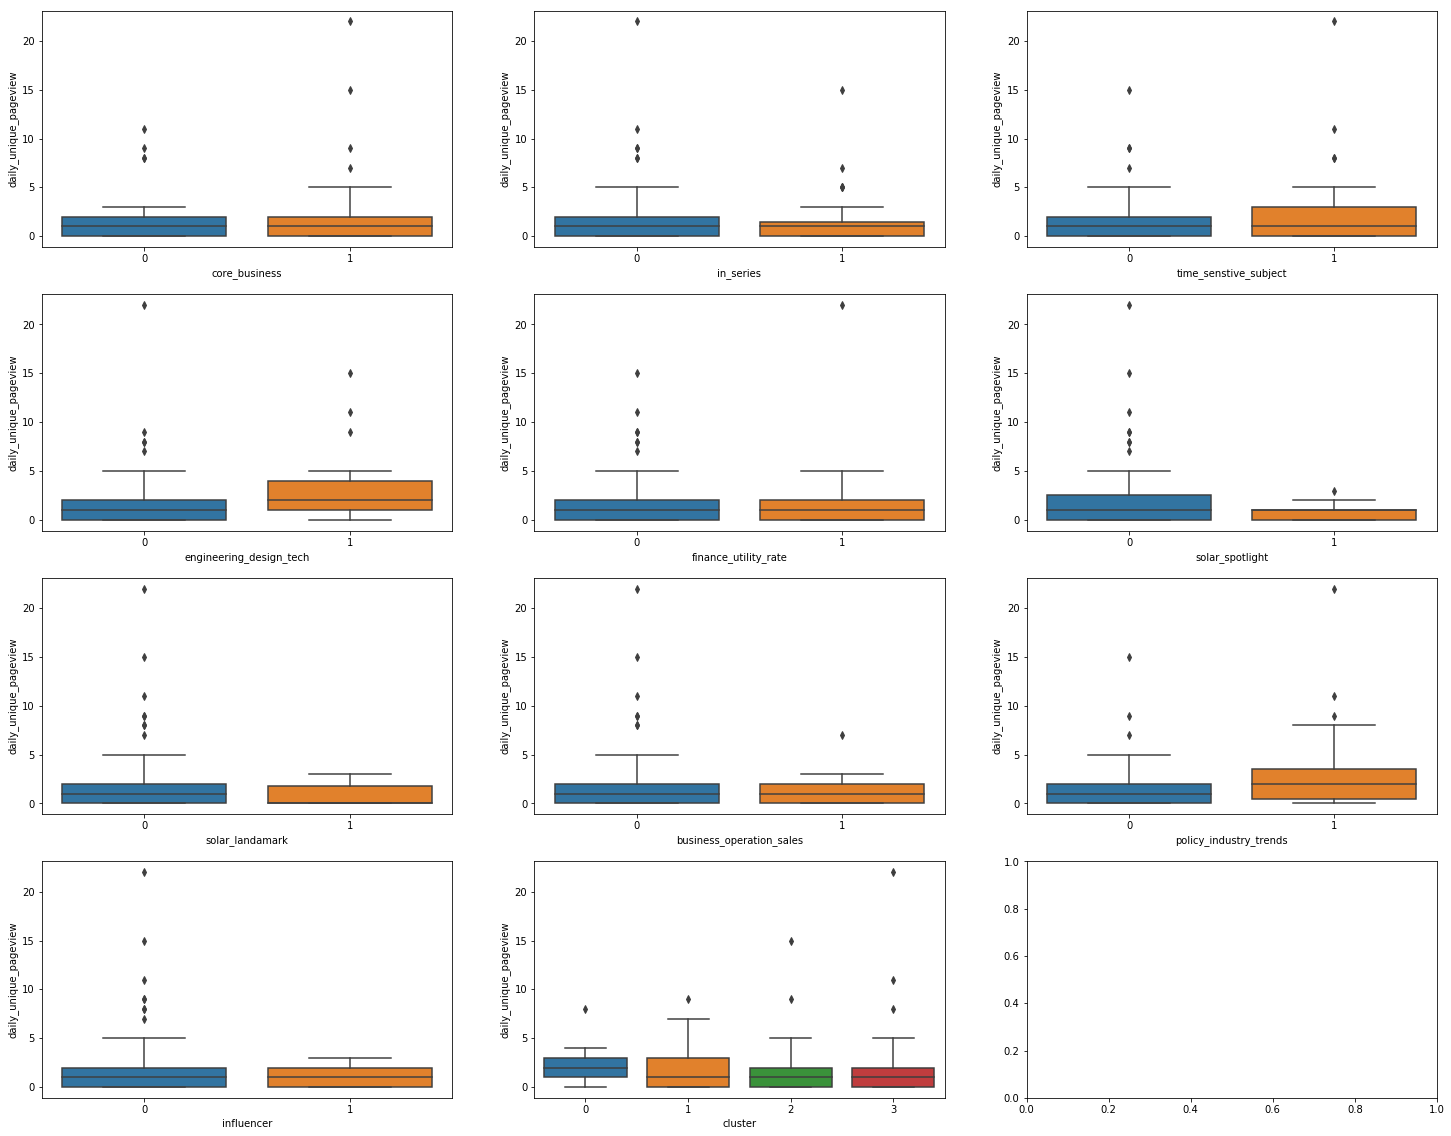

In [43]:
fig, ax = plt.subplots(int(round(len(categorical_features) / 3)), 3, figsize = (25, 20))

for i, ax in enumerate(fig.axes):
    if i < len(categorical_features) - 1:
        sns.boxplot(x=categorical_features[i],y='daily_unique_pageview', data=blog_data[categorical_features], ax=ax)



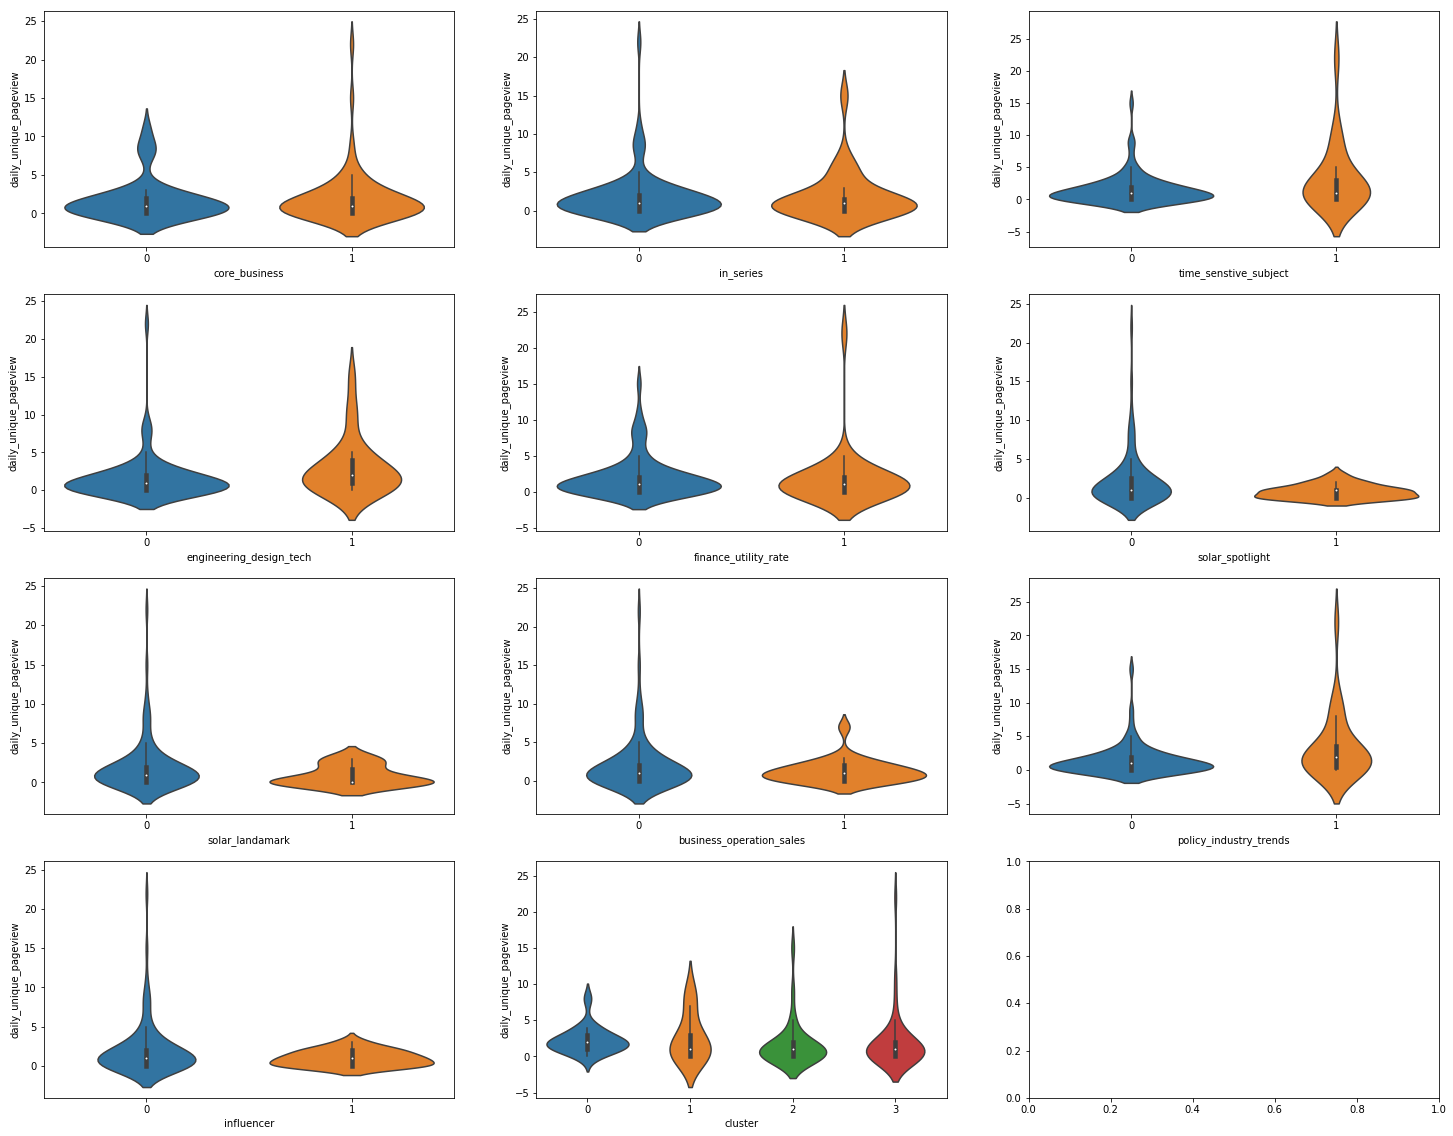

In [44]:
fig, ax = plt.subplots(int(round(len(categorical_features) / 3)), 3, figsize = (25, 20))

for i, ax in enumerate(fig.axes):
    if i < len(categorical_features) - 1:
        sns.violinplot(x=categorical_features[i],y='daily_unique_pageview', data=blog_data[categorical_features], ax=ax)



# PCA does not work in this case:
numeric variables in the data could not explain much variance

# machine learning models to find the characteristics that matters

## random forest

In [45]:
from sklearn.ensemble import RandomForestRegressor # checking if this is available
from sklearn.model_selection import train_test_split
import numpy as np

In [46]:
model_features = ['avg_word_count_in_sentence_x', 'avg_word_count_paragraph_x',
                             'total_word_count_x', 'graphic_paragraph_ratio_x', 'link_paragraph_ratio_x',
                             'noun_pct_x', 'adj_pct_x', 'adv_pct_x', 'verb_pct_x', 'question_in_titles_x', 
                              'reading_level_1_x', 'reading_level_2_x', 'sub_heading_paragraph_ratio_x'] + ['core_business', 'in_series', 'time_senstive_subject', 'engineering_design_tech', 'finance_utility_rate',
'solar_spotlight', 'solar_landamark', 'business_operation_sales', 'policy_industry_trends', 'influencer', 'cluster']
label_features = ['TimeOnPage', 'BounceRate', 'daily_pageview', 'daily_unique_pageview', 'daily_entrance']
features = blog_data[model_features]
labels = blog_data[label_features].iloc[:, 3]
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


('Training Features Shape:', (79, 24))
('Training Labels Shape:', (79,))
('Testing Features Shape:', (27, 24))
('Testing Labels Shape:', (27,))


In [47]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)
# Use the forest's predict method on the test data


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [48]:
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = sum((predictions - test_labels)**2)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

('Mean Absolute Error:', 378.79, 'degrees.')


In [32]:
min_err = 100**2
num_tree = 10
error_list = []
for ii in range(100, 5000, 100):
    
    rf = RandomForestRegressor(n_estimators = ii, random_state = 42)
    # Train the model on training data
    rf.fit(train_features, train_labels)
    predictions = rf.predict(test_features)
    # Calculate the absolute errors
    errors = sum((predictions - test_labels)**2)
#     print ii
#     print errors
    error_list.append((ii, errors))
    if errors <= min_err:
        min_err = errors
        num_tree = ii
print min_err
print num_tree

881.7186
100


In [33]:
# error_list

In [49]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
    # Train the model on training data
rf_model.fit(train_features, train_labels)
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = train_features.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

importance
total_word_count_x               0.236065
sub_heading_paragraph_ratio_x    0.138216
avg_word_count_paragraph_x       0.074444
reading_level_1_x                0.067976
avg_word_count_in_sentence_x     0.065527
question_in_titles_x             0.050481
adj_pct_x                        0.047591
link_paragraph_ratio_x           0.046624
engineering_design_tech          0.039048
verb_pct_x                       0.035024
noun_pct_x                       0.031726
cluster                          0.027068
policy_industry_trends           0.026027
reading_level_2_x                0.024035
graphic_paragraph_ratio_x        0.019744
finance_utility_rate             0.017659
in_series                        0.015879
time_senstive_subject            0.014244
adv_pct_x                        0.011638
core_business                    0.004702
business_operation_sales         0.003788
solar_landamark                  0.001760
solar_spotlight                  0.000539
influencer                       0.000196

# lasso regression

In [50]:

import sklearn.cross_validation as cv
from sklearn import linear_model
def frange(start, end, step):
    tmp = start
    while(tmp < end):
        yield tmp
        tmp += step  
alphas = frange(0.01, 100, 0.01)
# scores = np.empty_like(alphas)
scores = []
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(train_features, train_labels)
    scores.append(lasso.score(test_features, test_labels))
    print(a, lasso.coef_)
    
lassocv = linear_model.LassoCV()
lassocv.fit(train_features, train_labels)
lassocv_score = lassocv.score(train_features, train_labels)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)



/Applications/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(0.01, array([  9.69186395e-02,  -2.61092759e-02,   2.24810781e-03,
         0.00000000e+00,   8.02226738e-01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -3.37102479e-02,   1.68185340e-01,   0.00000000e+00,
        -1.24481003e+00,   1.44927313e+00,   8.68176058e-01,
         0.00000000e+00,   1.84226401e+00,  -4.71637194e-02,
        -2.36882950e+00,  -1.02848411e+00,   9.69036379e-01,
         3.30077891e+00,  -3.78875729e-01,  -1.51320859e-01]))
(0.02, array([  1.09621037e-01,  -2.62617291e-02,   2.20256087e-03,
         0.00000000e+00,   4.04118074e-01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -4.84847428e-02,   1.55712692e-01,   0.00000000e+00,
        -0.00000000e+00,   1.24352790e+00,   7.18157282e-01,
         0.00000000e+00,   1.73479787e+00,  -0.00000000e+00,
        -2.24577387e+00,  -8.82248727e-01,   7.37159057e-01,
         3.07029305e+00,  -3.09408955e-01,  -1.43097569e-01]))
(0.03,

In [36]:
# lassocv_alpha

In [37]:
max(scores)

0.032443375014259868

In [38]:
# print('CV', lassocv.coef_)

In [51]:
feature_importances = pd.DataFrame(lassocv.coef_,
                                   index = train_features.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

importance
avg_word_count_in_sentence_x     0.066228
reading_level_1_x                0.005547
total_word_count_x               0.001131
core_business                    0.000000
influencer                      -0.000000
policy_industry_trends           0.000000
business_operation_sales        -0.000000
solar_landamark                 -0.000000
solar_spotlight                 -0.000000
finance_utility_rate             0.000000
engineering_design_tech          0.000000
time_senstive_subject            0.000000
in_series                       -0.000000
sub_heading_paragraph_ratio_x   -0.000000
reading_level_2_x                0.000000
question_in_titles_x            -0.000000
verb_pct_x                      -0.000000
adv_pct_x                       -0.000000
adj_pct_x                        0.000000
noun_pct_x                       0.000000
link_paragraph_ratio_x           0.000000
graphic_paragraph_ratio_x        0.000000
cluster                         -0.000000
avg_word_count_paragraph_x      -0.014692

In [40]:
# from sklearn import preprocessing
# std_scale = preprocessing.StandardScaler().fit(features)
# scaled_features = std_scale.transform(features)
# train_features, test_features, train_labels, test_labels = train_test_split(scaled_features, labels, test_size = 0.25, random_state = 42)
# print('Training Features Shape:', train_features.shape)
# print('Training Labels Shape:', train_labels.shape)
# print('Testing Features Shape:', test_features.shape)
# print('Testing Labels Shape:', test_labels.shape)


# from sklearn import preprocessing

# std_scale = preprocessing.StandardScaler().fit(X_train)
# X_train_std = std_scale.transform(X_train)
# X_test_std = std_scale.transform(X_test)

In [41]:
# rf_model = RandomForestRegressor(n_estimators = 300, random_state = 42)
#     # Train the model on training data
# rf_model.fit(train_features, train_labels)
# feature_importances = pd.DataFrame(rf_model.feature_importances_,
#                                    index = train_features.columns,
#                                    columns=['importance']).sort_values('importance', ascending=False)
# feature_importances

In [42]:
# scaled_features